In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("/content/dataset1.csv")
df.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
6,müller mox figura centralis circulorum doctoru...,Latin
7,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
8,kemunculan pertamanya adalah ketika mencium ka...,Indonesian
9,barocco pt escândalo de ª página é um filme fr...,Portugese


In [3]:
df.shape

(20000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      20000 non-null  object
 1   language  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [5]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [6]:
df[df.duplicated()]

,Text,language
375,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
531,haec commentatio automatice praeparata res ast...,Latin
916,haec commentatio automatice praeparata res ast...,Latin
930,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
1332,haec commentatio automatice praeparata res ast...,Latin
...,...,...
19479,seperti asteroid secara keseluruhan asteroid i...,Indonesian
19490,كباقي كويكبات معسكر الإغريق يقع مداره في النقط...,Arabic
19702,خواص - نسبتا اسيدي خواص لري په اوبو کى منحل دي...,Pushto
19770,இவ்வூர் கடல்மட்டத்தில் இருந்து சராசரியாக மீட்...,Tamil


In [7]:
len(df[df.duplicated()])

141

In [8]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [9]:
df.shape

(19859, 2)

In [10]:
df["language"].nunique()

20

In [11]:
df["language"].value_counts()

Korean        1000
Thai          1000
English       1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

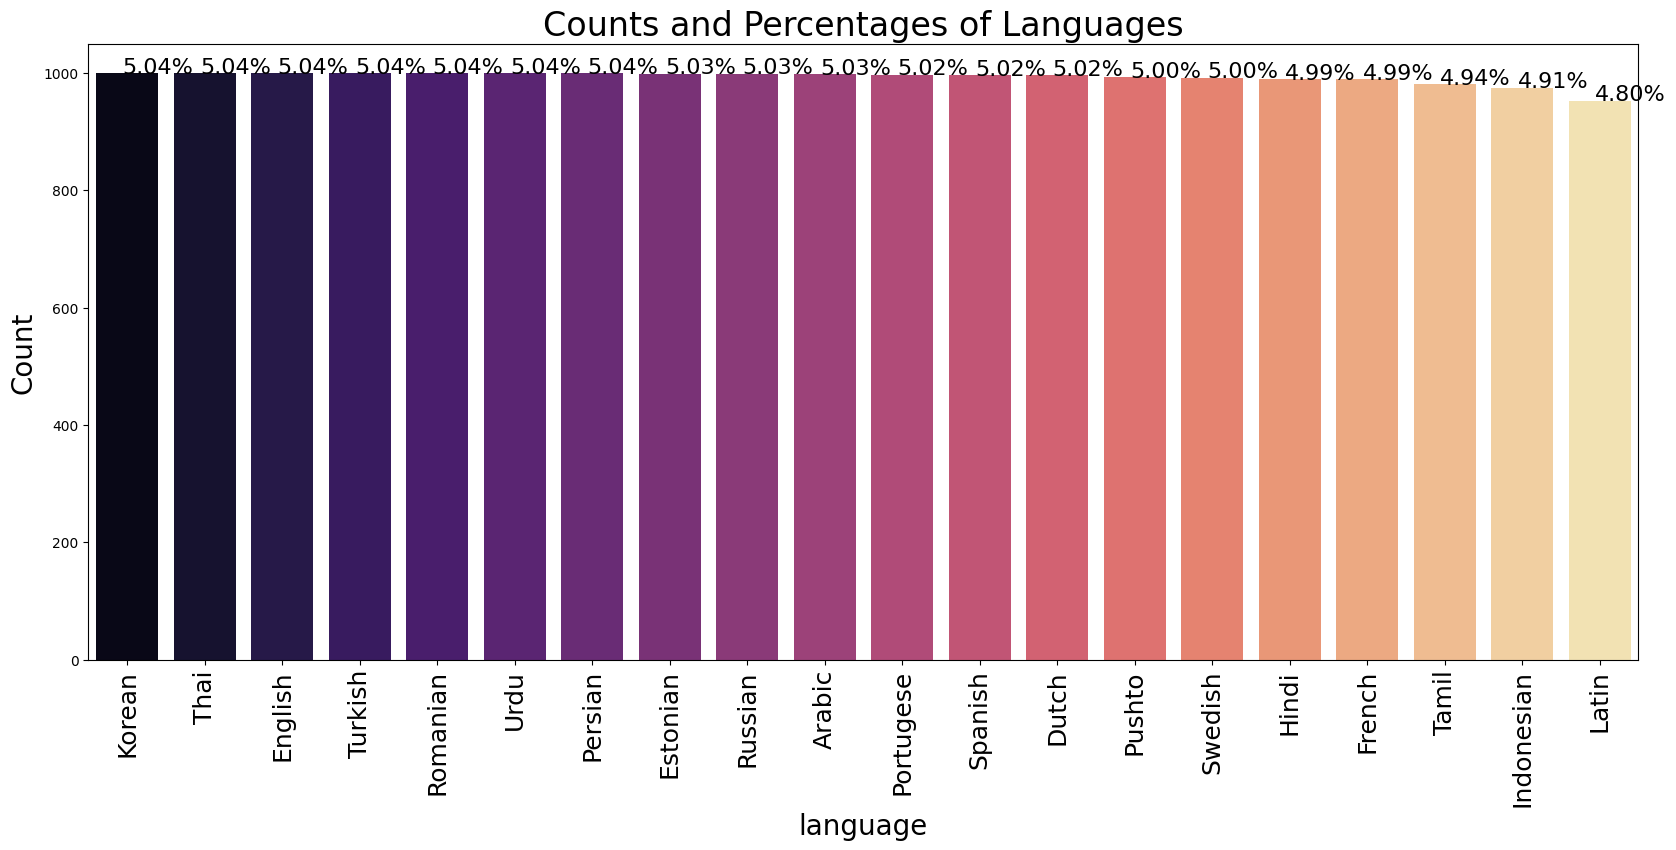

In [12]:
plt.figure(figsize=(20,8))

total= float(len(df['language']))
ax= sns.countplot(x= 'language', data= df, order= df['language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')

plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90)
plt.show()

In [13]:
language= df['language'].value_counts().reset_index()
language

,index,language
0,Korean,1000
1,Thai,1000
2,English,1000
3,Turkish,1000
4,Romanian,1000
5,Urdu,1000
6,Persian,1000
7,Estonian,999
8,Russian,999
9,Arabic,998


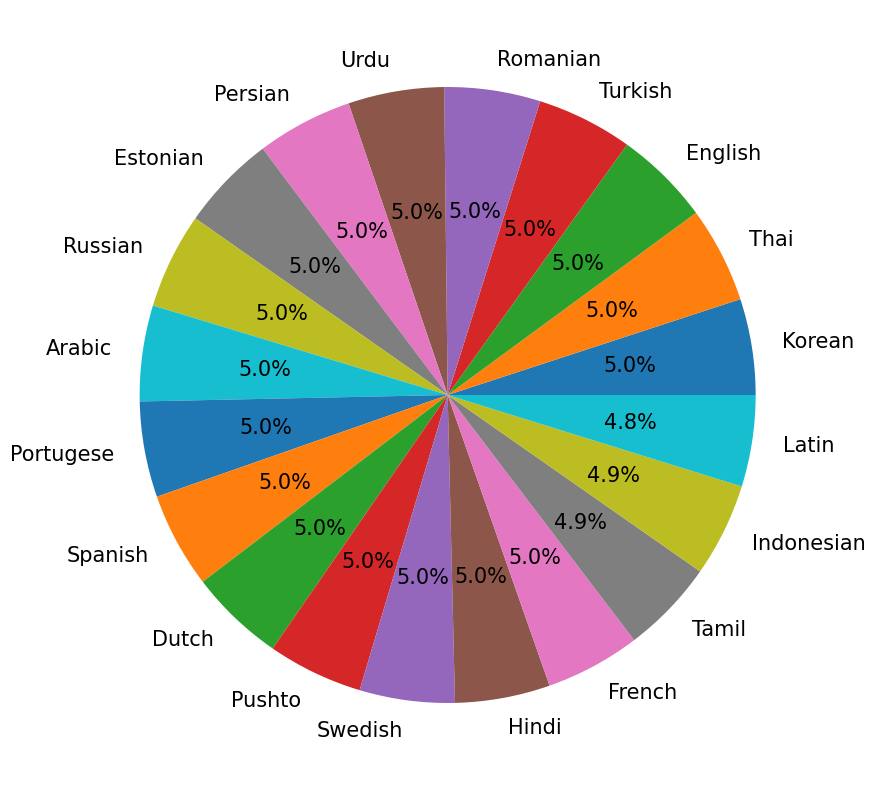

In [14]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

In [15]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,language,cleaned_Text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,
4,de spons behoort tot het geslacht haliclona en...,Dutch,
...,...,...,...
19995,அனாதரவற்ற சிறுவர்களை அரவணைக்கும் முகமாக சிறுவர...,Tamil,
19996,hors du terrain les années et sont des année...,French,
19997,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,
19998,con motivo de la celebración del septuagésimoq...,Spanish,


In [16]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

    return Text

In [17]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,language,cleaned_Text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuits...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
...,...,...,...
19995,அனாதரவற்ற சிறுவர்களை அரவணைக்கும் முகமாக சிறுவர...,Tamil,அனாதரவற்ற சிறுவர்களை அரவணைக்கும் முகமாக சிறுவர...
19996,hors du terrain les années et sont des année...,French,hors du terrain les années et sont des années ...
19997,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเด...
19998,con motivo de la celebración del septuagésimoq...,Spanish,con motivo de la celebración del septuagésimoq...


In [31]:
df1.to_csv("cleaned_dataset.csv")